Exploratory_Data_Analysis_on_Haberman's_Dataset
Question: Work on the Data set and try to find the relation between the dimensions so that we can formulate a  relation between the dimensions and have a predetermined notion for patients  survival status

 # Data Extraction :-¶
   1. Loading the Haberman's cancer survival data set in python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"E:\Python save files\Assignments Python\Assig 1\haberman.csv")

In [3]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 2.2 Domain Knowlegde and data insights:

1. The dataset comprises three distinct features:
   i.. "age" which signifies the age of patients at the time of their surgical procedures.   ii. . "year" indicating the year in which the surgery was performed   iii. i. "nodes" representing the presence of lymph nodes, pivotal in filtering lymph fluid and potentially indicating the risk of cancer spred2

2. The 'status' column classifies patients into two categories:
    '1' denoting those who survived for five years or more post-surgery and
    '2' for those who survived less than five years.
years.


# Data cleaning:-
2. Performing statisitcs on the dataset.
t

2.1 Finding out no. of features, data points and column names of the data set.

In [4]:
print("shape of dataset:-")
df.shape

shape of dataset:-


(306, 4)

In [5]:
print("Column names are:-")
df.columns


Column names are:-


Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
df.isna().sum().sort_values(ascending=True)

age       0
year      0
nodes     0
status    0
dtype: int64

#### Observation:-

1. There are 306 datapoints (rows) and 4 columns.
2. The name of the columns are age, year, nodes and status.
3. There are no null values.

# Data Transformation
2.2 Finding out no. of data points per class and range of features in the data set

In [7]:
#Binning age columns:- 
df["age"].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [8]:
def age_bin(x):
    if x>=30 and x<=40:
        return "30-40"
    elif x>=40 and x<=50:
        return "41-50"
    elif x>=50 and x<=60:
        return "51-60"
    elif x>=60 and x<=70:
        return "61-70"
    else:
        "71-85"

In [9]:
df["age_group"] = df["age"].apply(age_bin)
df.head()

,age,year,nodes,status,age_group
0,30,64,1,1,30-40
1,30,62,3,1,30-40
2,30,65,0,1,30-40
3,31,59,2,1,30-40
4,31,65,4,1,30-40


In [10]:
df["nodes"].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [11]:
df.dtypes

age           int64
year          int64
nodes         int64
status        int64
age_group    object
dtype: object

In [12]:
#Finding out no. of data points per class
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [13]:
df['year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

In [14]:
# finding the range of each feature of the data set
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [15]:
def feature_range(col):
    minimum = df[col].describe()[3] 
    maximum = df[col].describe()[7]
    return f"the range of {col} is {minimum} - {maximum}"


In [16]:
feature_range("age")

'the range of age is 30.0 - 83.0'

In [17]:
feature_range("nodes")

'the range of nodes is 0.0 - 52.0'

# OR to find the range of each feature of the data set

In [18]:

print(df['age'].max())
print(df['age'].min())
print(df['year'].max())
print(df['year'].min())
print(df['nodes'].max())
print(df['nodes'].min())


83
30
69
58
52
0


#### Observation:-

1. The dataset contains 225 data points for class 1 (status 1), representing patients who survived for five years or more after surgery, and 81 data points for class 2 (status 2), indicating patients who survived for less than five year.

2. The age of the patients in the dataset ranges from 30 to 83 yers.

3. The dataset includes surgery years ranging from 1958 to1969.

4. The number of lymph nodes ranges from 0 to an unspecified uppe limit.

5. This dataset is characterized as unbalanced due to the uneven distribution of patients between class 1 (225 patients) and class 2 (81 atients).

6. Within the dataset, there are 225 patients classified as status 1, indicating they survived for five years or more after surgery, and 81 patients classified as status 2, indicating they survived for less than five years.2).

# Univariate Analysis :-

In [19]:
df.columns

Index(['age', 'year', 'nodes', 'status', 'age_group'], dtype='object')

i. Age

<function matplotlib.pyplot.show(close=None, block=None)>

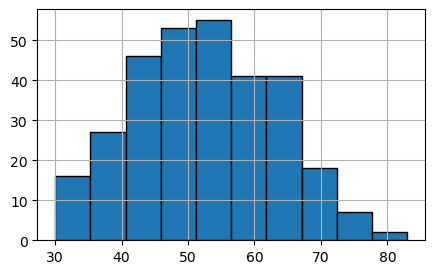

In [20]:
plt.figure(figsize=(5,3))
plt.hist(df["age"],bins=10,edgecolor='black')
plt.grid(True)
plt.show

In [21]:
df["age_group"].value_counts()

41-50    93
51-60    93
61-70    63
30-40    43
Name: age_group, dtype: int64

#### Obsevation :-

1. The majority of the patients in the dataset fall within the age range of 41 to 60 years.

2. most of the pat during surgery ien intrangegroup of 41 to 60

ii. Status

In [22]:
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [23]:
df["status"].value_counts().values

array([225,  81], dtype=int64)

In [24]:
df["status"].value_counts().index

Int64Index([1, 2], dtype='int64')

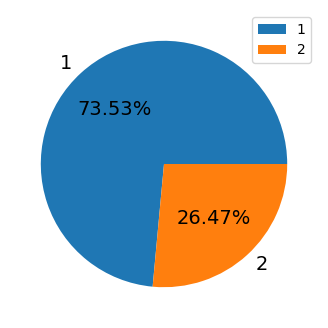

In [25]:
plt.figure(figsize = (5,4))
plt.pie(df['status'].value_counts().values, labels=df['status'].value_counts().index,autopct="%.2f%%",textprops={'fontsize': 14})
plt.legend()
plt.show()

# 3. Bivariate analysis on the dataset

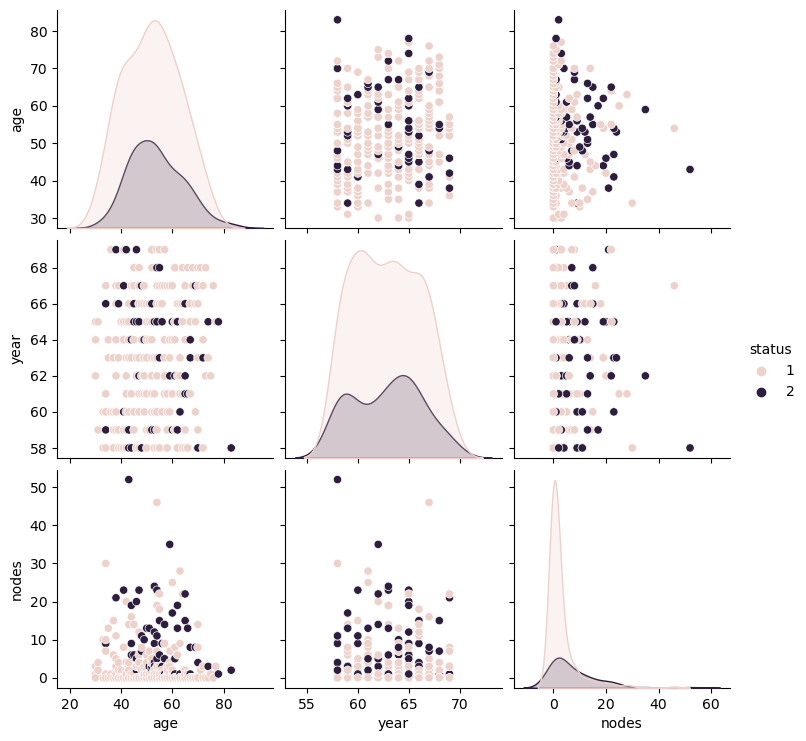

In [26]:
df_biv = df[['age', 'year', 'nodes', 'status']]
sns.pairplot(df_biv,hue="status")
plt.show()

<Axes: >

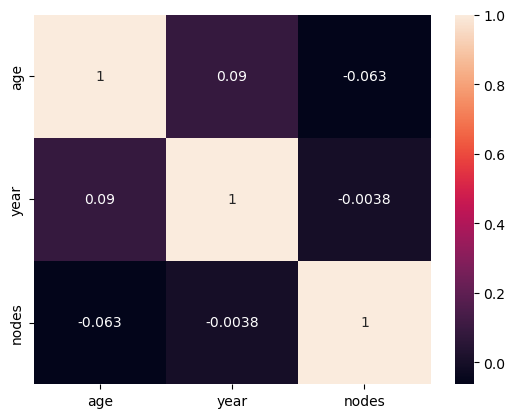

In [27]:
df_corr= df[['age', 'year', 'nodes']]
sns.heatmap(df_corr.corr(),annot= True)

2D scatter plot of nodes vs age


<Figure size 1000x800 with 0 Axes>

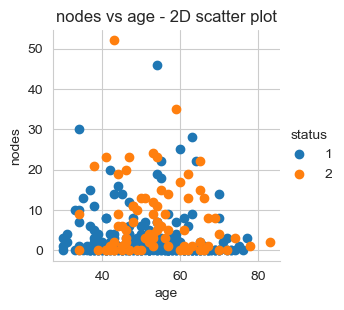

In [28]:
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status').map(plt.scatter,'age','nodes').add_legend()

print('2D scatter plot of nodes vs age')
plt.title('nodes vs age - 2D scatter plot')
plt.show()

 #### Observation from Bivariate analysis (scatter plots and 2D pair plots):-

1. There are 3 unique pair-plots in the plot matrix with a combination of nodes-age, nodes-year and year-age
2. In any of the combinations of the pair-plots, it becomes evident that distinguishing the survival status is not straightforward due to significant overlap among the data points.
   So, since, 2-D pair plots are not giving any clear insights for classification of the data set. 
So, moving to 1-D plots to understand how can we classify the survival status bed on individual features.

# Histograms (density plots) and PDF plot

### Histogram and PDF Plots

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
def hist_pdf(col):
    plt.figure(figsize=(5,5))
    sns.set(style="whitegrid")
    sns.distplot(df[df["status"] == 1][col], kde=True, color="blue", label="Status 1")
    sns.distplot(df[df["status"] == 2][col], kde=True, color="red", label="Status 2")
    plt.legend()
    plt.show()

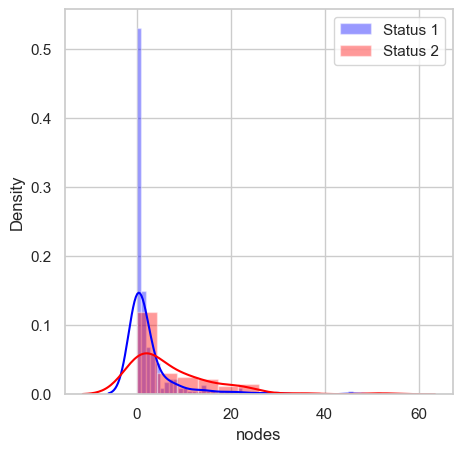

In [31]:
hist_pdf("nodes")

#### Observation

1. Maximum no.of pateints of type status 1 have 0 nodes
2. Maximum no.of pateints of type status 2 also have 0 nodes
3. For both the type of patients majority of them lie in the range of 0-25 of nodes
4.For nodes 0 to 5 the no. of data points of patients being of"status 1" is higher tham that of "status 2"
5. For nodes 5 to 30 the no. of data points of patients being of "status 2" is higher tham that of "status 1"

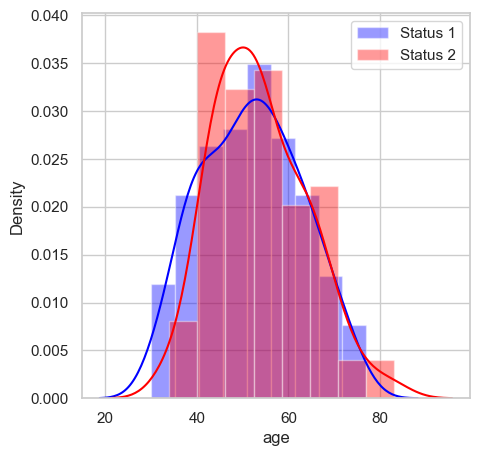

In [32]:
hist_pdf("age")

#### Observation:

1. Maximum no. of pateints of type status 1 is of age 52
2. The patients of age 30- 34 are purely of status 1
3. Maximum no. of pateints of type status 2 is of age 40
4. The patients of age 78-83 are purely of status 2
5. For age range from 34-42 the probalibility of pateint being of "status 1" is higher tham that of "status 2"
6. For age range from 42-56 the probalibility of pateint being of "status 2" is higher tham that of "status 1"
7. For age range from 56-78 the probalibility of of both the pateints is same since the pdf plots are almost overlapping each other
8. For patient's age ranging from 34- 78 status 1 and 2 overlap each each and we can only say that whihc type of pitients has a high probability to lie in this region but it is diddficult to completely classify the patients in this range

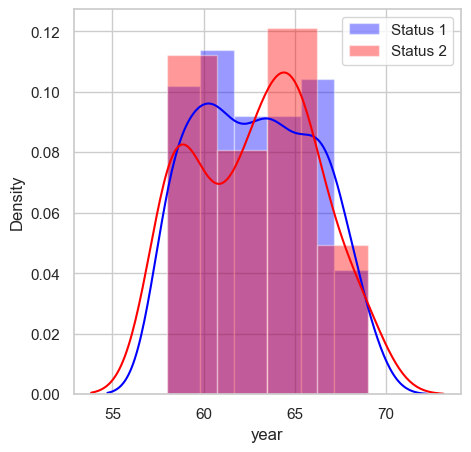

In [33]:
hist_pdf("year")

#### Observation:

1. Both the type of patients were found who have undergone a surgery between 1958 to 1969
2. Maximum no. of status 1 pateints were found in the period of 1960-61
3. Maximum no. of status 2 pateints were found in the period of 1964-66
4. From 1959-1963 and from 1966-1969 the the probalibility of pateint being of "status 1" is higher tham that of "status 2"
5. From 1958-1959 and from 1963-1966 the the probalibility of pateint being of "status 2" is higher than that of "status 1"


# Violin and Box plots

### Violin plot

Violin plot for nodes


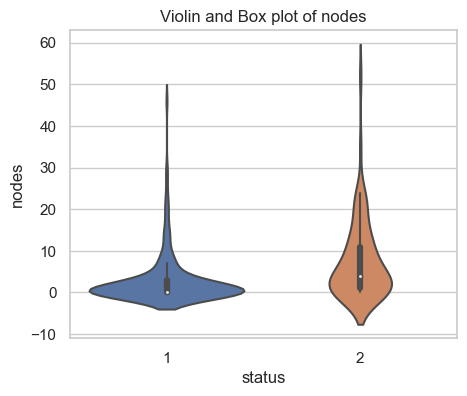

In [34]:
plt.figure(figsize=(5,4))
print('Violin plot for nodes')
sns.violinplot(x='status', y='nodes', data=df, size=8)
plt.title('Violin and Box plot of nodes')
plt.show()


Violin plot for age


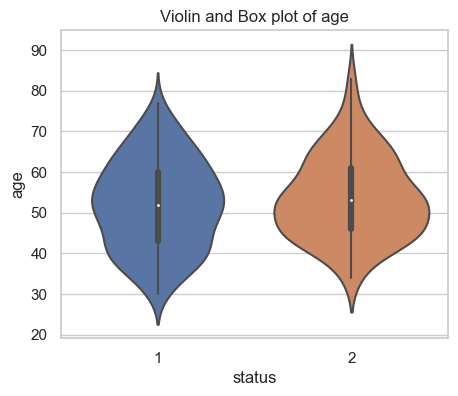

Violin plot for year


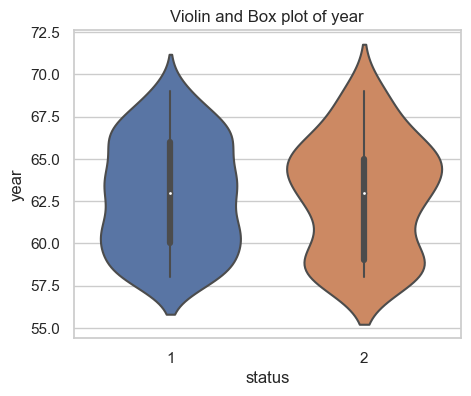

In [35]:
plt.figure(figsize=(5,4))
print('Violin plot for age')
sns.violinplot(x='status', y='age', data=df, size=8)
plt.title('Violin and Box plot of age')
plt.show()

plt.figure(figsize=(5,4))
print('Violin plot for year')
sns.violinplot(x='status', y='year', data=df, size=8)
plt.title('Violin and Box plot of year')
plt.show()

#### Observations:

1. From Voilin and box plot of nodes i) Status 1 patients: 25 % and 50 % of the patients coincide at 0 node and 75% of the patients lie from 0 to 3 nodes. The majority of the density lies between 0 to 5 nodes which in nearly 85% of these patients and maximum no. of such patients have 0 nodes ii) Status 2 patients: 25 % of the patients lie at 0 node, 50 % from 0 to 3 nodes and 75% of the patients lie from 0 to 11 nodes. The majority of the density lies between 0 to 12 nodes which in nearly 55% of these patients and maximum no. of such patients have 2 nodes

2. From Voilin and box plot of age i) Status 1 patients: 25 % of the patients lie in the age range of 30 to 44 years, 50 % of the patients lie in the age range of 30 to 52 years and 75% of the patients lie in the range of 30 to 60 years. The maximum no. of such patients are of 54 years of age. ii) Status 2 patients: 25 % of the patients lie in the age range of 34 to 46 years, 50 % of the patients lie in the age range of 34 to 54 years and 75% of the patients lie in the range of 34 to 62 years. The maximum no. of such patients are of 50 years of age.

The violin and box plots of both the types of patients are almost identical to each other

3. From Voilin and box plot of year i) Status 1 patients: 25 % of the patients have undergone a surgery between 1958 - 1960 , 50 % of the patients have undergone a surgery between 1958 - 1963 and 75% of the patients have undergone a surgery between 1958 - 1966. The maximum no. of such patients have undergone a surgery at 1960. ii) Status 2 patients: 25 % of the patients have undergone a surgery between 1958 - 1959 , 50 % of the patients have undergone a surgery between 1958 - 1963 and 75% of the patients have undergone a surgery between 1958 - 1965. The maximum no. of such patients have undergone a surgery at 1964.
The violin and box plots of both the types of patients are alomst identical in its range and behavoir with the only difference in their maximum density points.

### Box Plot

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
df_status1=df[df["status"]==1]
df_status2=df[df["status"]==2]

In [43]:
def boxplot_analysis(col):
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_status1, x=col, orient="h", palette="rainbow")
    plt.title(f"{col} by status=1")
    plt.ylabel(col)  # Change from plt.xlabel to plt.ylabel for vertical boxplots
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_status2, x=col, orient="h", palette="rainbow")
    plt.title(f"{col} by status=2")
    plt.ylabel(col)  # Change from plt.xlabel to plt.ylabel for vertical boxplots
    plt.show()


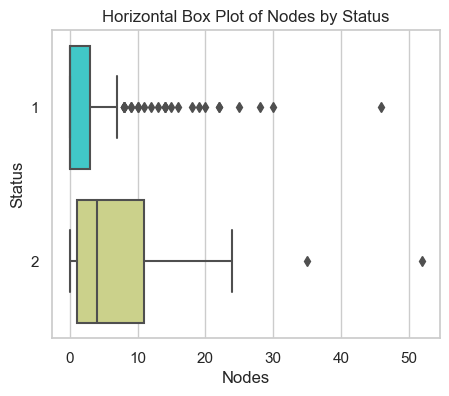

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a horizontal box plot for "nodes" column grouped by "status"
plt.figure(figsize=(5, 4))
sns.boxplot(x='nodes', y='status', data=df, orient='h', palette='rainbow')
plt.title('Horizontal Box Plot of Nodes by Status')
plt.xlabel('Nodes')
plt.ylabel('Status')
plt.show()

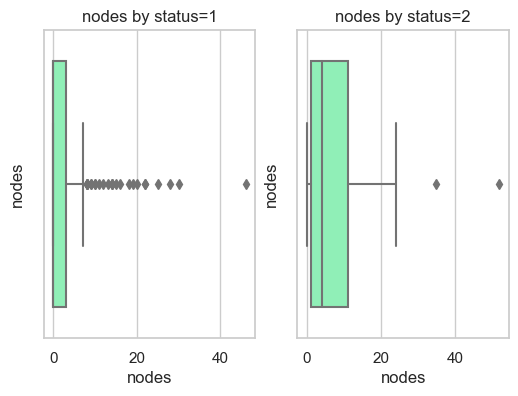

In [44]:
boxplot_analysis("nodes")

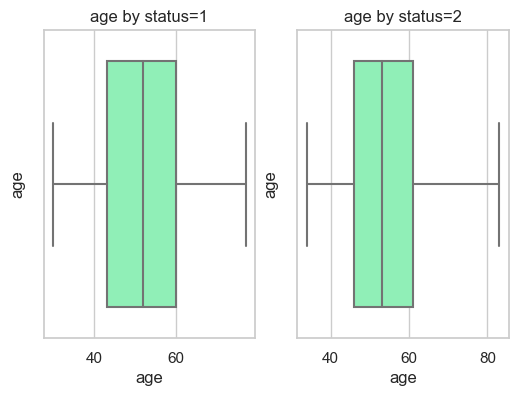

In [45]:
boxplot_analysis("age")

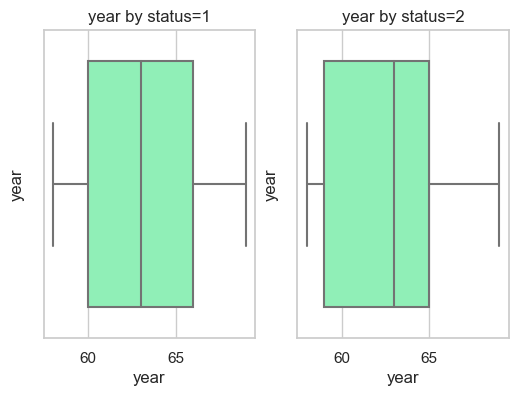

In [46]:
boxplot_analysis("year")

### Conclusion from EDA performed and Haberman's cancer survival data set:-
 Using nodes to classify the patient's status is more promoninent than the other two (age and year).
Use of nodes to classify the data gives us an accuracy of 85% to pridict of the patients of "status 1" and accuracy of 44% to predict for "status 2".

1. The data set has 306 datapoints (rows) and 4 columns
2. The name of the columns are age, year, nodes and status where age, year, nodes are the features and status consists the classes of the Haberman's data set. So, this data set has 3 fetaures and 2 classes (status 1 and status 2)
3. There are 225 data points for class 1 (status 1) and 81 data points for class 2 (status 2).
4. For Haberman's data set Bivariate analaysis did not give a clear picture in order to define as logic to classify the patients as fro all the features majority of data points overlap each other.
5. Univariate Analysis gave better clarity in order to choose a feature with which we can classify the patients based on the class in the best possible way
6. Nodes turned out to be the best feature out of the 3 features.
7. Use of nodes to classify the data gives us an accuracy of 85% to predict of the patients of "status 1" and accuracy of 44% to predict for "status 2".